In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import chi2, SelectKBest, SelectPercentile
from sklearn.metrics import accuracy_score

In [3]:
titanic = sns.load_dataset('titanic')

In [4]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
# can only be applied to categorical variables. Hence age and fare cannot be considered to be applied via this test

In [8]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [9]:
titanic.drop(['age', 'deck'], axis=1,inplace=True)

In [10]:
titanic.head()

,survived,pclass,sex,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [11]:
titanic.dropna(inplace=True)

In [12]:
titanic.isnull().sum()

survived       0
pclass         0
sex            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

In [23]:
data = titanic[['pclass', 'sex', 'sibsp','parch', 'embarked', 'who', 'alone']].copy()

In [24]:
data.head()

,pclass,sex,sibsp,parch,embarked,who,alone
0,3,male,1,0,S,man,False
1,1,female,1,0,C,woman,False
2,3,female,0,0,S,woman,True
3,1,female,1,0,S,woman,False
4,3,male,0,0,S,man,True


In [25]:
sex = {'male':0, 'female': 1}
data['sex'] = data['sex'].map(sex)

In [26]:
data.head()

,pclass,sex,sibsp,parch,embarked,who,alone
0,3,0,1,0,S,man,False
1,1,1,1,0,C,woman,False
2,3,1,0,0,S,woman,True
3,1,1,1,0,S,woman,False
4,3,0,0,0,S,man,True


In [27]:
ports = {'S': 0, 'C': 1, 'Q': 2}
data['embarked'] = data['embarked'].map(ports)

In [28]:
data.head()

,pclass,sex,sibsp,parch,embarked,who,alone
0,3,0,1,0,0,man,False
1,1,1,1,0,1,woman,False
2,3,1,0,0,0,woman,True
3,1,1,1,0,0,woman,False
4,3,0,0,0,0,man,True


In [29]:
who = {'man': 0, 'woman': 1, 'child': 2}
data['who'] = data['who'].map(who)

In [30]:
alone = {True: 1, False: 0}
data['alone'] = data['alone'].map(alone)

In [31]:
data.head()

,pclass,sex,sibsp,parch,embarked,who,alone
0,3,0,1,0,0,0,0
1,1,1,1,0,1,1,0
2,3,1,0,0,0,1,1
3,1,1,1,0,0,1,0
4,3,0,0,0,0,0,1


**Do F-score(chi-squared test)**

In [32]:
X = data.copy()
Y = titanic['survived']

In [33]:
X.shape, Y.shape

((889, 7), (889,))

In [34]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [35]:
f_score = chi2(x_train, y_train)

In [36]:
f_score

(array([ 22.65169202, 152.91534343,   0.52934285,  10.35663782,
         16.13255653, 161.42431175,  13.4382363 ]),
 array([1.94189138e-06, 3.99737147e-35, 4.66883271e-01, 1.29009955e-03,
        5.90599986e-05, 5.52664700e-37, 2.46547298e-04]))

In [37]:
p_values = pd.Series(f_score[1])
p_values.index = x_train.columns

In [38]:
p_values.sort_values(ascending=True,inplace=True)

In [39]:
p_values

who         5.526647e-37
sex         3.997371e-35
pclass      1.941891e-06
embarked    5.906000e-05
alone       2.465473e-04
parch       1.290100e-03
sibsp       4.668833e-01
dtype: float64

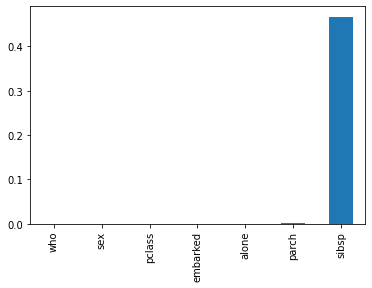

In [41]:
p_values.plot.bar()

In [42]:
#select only who and sex as they have very low p-values

In [43]:
x_train_2 = x_train[['who', 'sex']]
x_test_2 = x_test[['who', 'sex']]

In [44]:
def run_random_forest(x_train, x_test, y_train, y_test):
  clf = RandomForestClassifier()
  clf.fit(x_train, y_train)
  y_pred = clf.predict(x_test)
  print('Model Accuracy on test set: ', accuracy_score(y_test, y_pred))

In [45]:
%%time
run_random_forest(x_train, x_test, y_train, y_test)

Model Accuracy on test set:  0.7359550561797753
CPU times: user 196 ms, sys: 2.58 ms, total: 198 ms
Wall time: 207 ms


In [46]:
%%time
run_random_forest(x_train_2, x_test_2, y_train, y_test)

Model Accuracy on test set:  0.7191011235955056
CPU times: user 167 ms, sys: 2.78 ms, total: 170 ms
Wall time: 175 ms


In [49]:
x_train_3 = x_train[['who', 'sex', 'pclass']]
x_test_3 = x_test[['who', 'sex', 'pclass']]

In [50]:
%%time
run_random_forest(x_train_3, x_test_3, y_train, y_test)

Model Accuracy on test set:  0.7415730337078652
CPU times: user 182 ms, sys: 682 µs, total: 183 ms
Wall time: 188 ms


In [51]:
x_train_4 = x_train[['who', 'sex', 'pclass', 'embarked']]
x_test_4 = x_test[['who', 'sex', 'pclass', 'embarked']]

In [52]:
%%time
run_random_forest(x_train_4, x_test_4, y_train, y_test)

Model Accuracy on test set:  0.7584269662921348
CPU times: user 199 ms, sys: 2.51 ms, total: 202 ms
Wall time: 206 ms


In [55]:
x_train_5 = x_train[['who', 'sex', 'pclass', 'embarked', 'alone']]
x_test_5 = x_test[['who', 'sex', 'pclass', 'embarked', 'alone']]

In [56]:
%%time
run_random_forest(x_train_5, x_test_5, y_train, y_test)

Model Accuracy on test set:  0.7528089887640449
CPU times: user 185 ms, sys: 6.54 ms, total: 191 ms
Wall time: 195 ms
